# Time Series Analysis of Day 2

In [1]:
# Simple Moving Average

# Cumulative Moving Average

# Exponential Weighted Moving Average

# Moving Average (Formula) [ACF] {MA}

# AutoRegressive Model   [PACF (Partial Auto-Correlation Plot)] {AR}

# {AR} + {MA}  = {ARMA}

# ARIMA , ARIMAX, SARIMAX

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333
2017-11-07,20.433332,20.002001,20.068001,20.403334,79414500.0,20.403334
2017-11-08,20.459333,20.086666,20.366667,20.292667,70879500.0,20.292667
2017-11-09,20.297333,19.753332,20.166668,20.199333,81706500.0,20.199333
...,...,...,...,...,...,...
2022-10-27,233.809998,222.850006,229.770004,225.089996,61638800.0,225.089996
2022-10-28,228.860001,216.350006,225.399994,228.520004,69152400.0,228.520004
2022-10-31,229.850006,221.940002,226.190002,227.539993,61554300.0,227.539993


## Simple Moving Average

#### A simple moving average tells us the unweighted mean of the previous K data points.

<AxesSubplot:xlabel='Date'>

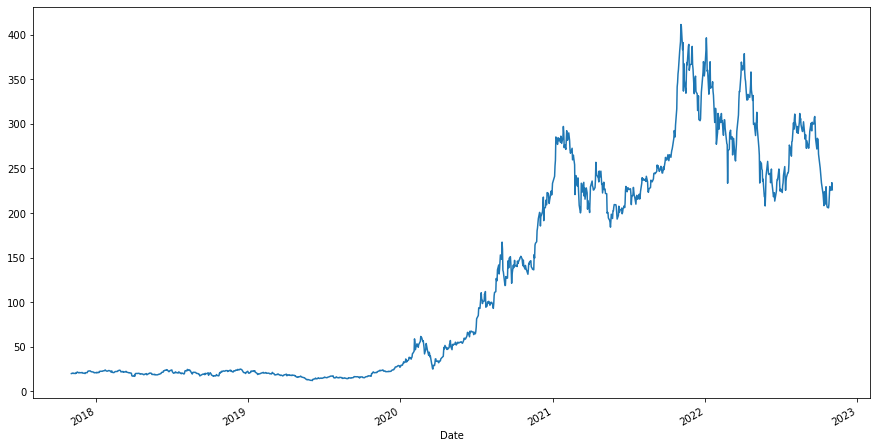

In [4]:
df_tesla['Open'].plot(figsize=(15,8))

### Rolling Parameter Information

In [5]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

### Open : 10 days rolling

In [6]:
df_tesla['Open : 10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

In [7]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open : 10 days rolling
Date,,,,,,,
2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000,19.966667
2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333,20.216667
2017-11-07,20.433332,20.002001,20.068001,20.403334,79414500.0,20.403334,20.167112
2017-11-08,20.459333,20.086666,20.366667,20.292667,70879500.0,20.292667,20.217000
2017-11-09,20.297333,19.753332,20.166668,20.199333,81706500.0,20.199333,20.206934


In [8]:
df_tesla[['Open','Open : 10 days rolling']]

,Open,Open : 10 days rolling
Date,,
2017-11-03,19.966667,19.966667
2017-11-06,20.466667,20.216667
2017-11-07,20.068001,20.167112
2017-11-08,20.366667,20.217000
2017-11-09,20.166668,20.206934
...,...,...
2022-10-27,229.770004,216.314000
2022-10-28,225.399994,216.453000
2022-10-31,226.190002,218.068001


<AxesSubplot:xlabel='Date'>

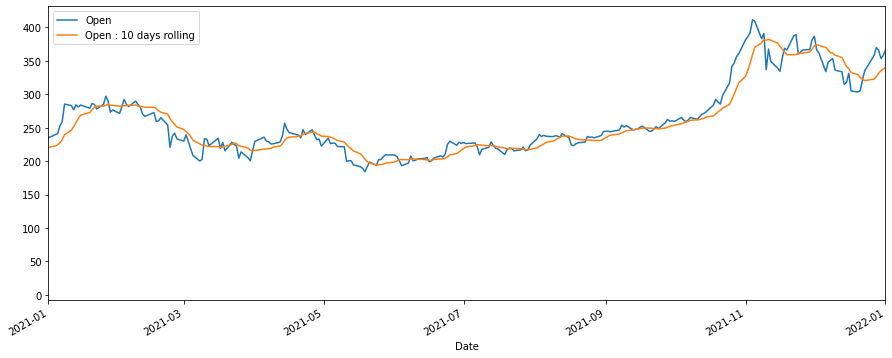

In [9]:
df_tesla[['Open','Open : 10 days rolling']].plot(xlim=['2021-01-01', '2022-01-01'], figsize=(15, 6))

### Open : 30 days rolling

In [10]:
df_tesla['Open : 30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

### Open : 50 days rolling

In [11]:
df_tesla['Open : 50 days rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

### Plotting of Open, Open 10, Open 30 and Open 50 Days Rolling

In [12]:
df_tesla[['Open', 'Open : 10 days rolling', 'Open : 30 days rolling', 'Open : 50 days rolling']]

,Open,Open : 10 days rolling,Open : 30 days rolling,Open : 50 days rolling
Date,,,,
2017-11-03,19.966667,19.966667,19.966667,19.966667
2017-11-06,20.466667,20.216667,20.216667,20.216667
2017-11-07,20.068001,20.167112,20.167112,20.167112
2017-11-08,20.366667,20.217000,20.217000,20.217000
2017-11-09,20.166668,20.206934,20.206934,20.206934
...,...,...,...,...
2022-10-27,229.770004,216.314000,248.018998,264.753997
2022-10-28,225.399994,216.453000,245.545332,263.141997
2022-10-31,226.190002,218.068001,243.081999,261.685797


<AxesSubplot:xlabel='Date'>

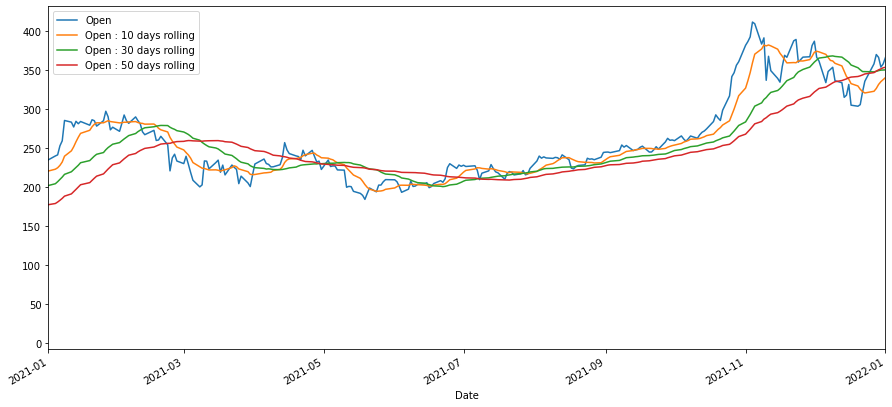

In [13]:
df_tesla[['Open','Open : 10 days rolling', 'Open : 30 days rolling', 'Open : 50 days rolling']].plot(xlim=['2021-01-01', '2022-01-01'], figsize=(15, 7))

### Disadvantages of Simple Moving Average

## Cumulative Moving average (Expanding)

#### The Cumulative Moving Average is the mean of all the previous values up to the current value.

In [14]:
df_tesla['Open'].expanding().mean().head()

Date
2017-11-03    19.966667
2017-11-06    20.216667
2017-11-07    20.167112
2017-11-08    20.217000
2017-11-09    20.206934
Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

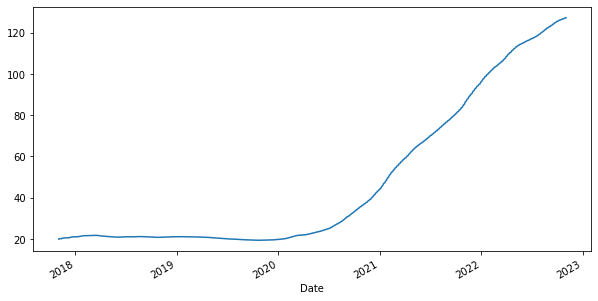

In [15]:
df_tesla['Open'].expanding().mean().plot(figsize=(10, 5))

## Exponential Moving Average

### EWM for Open alpha 0.1

In [16]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

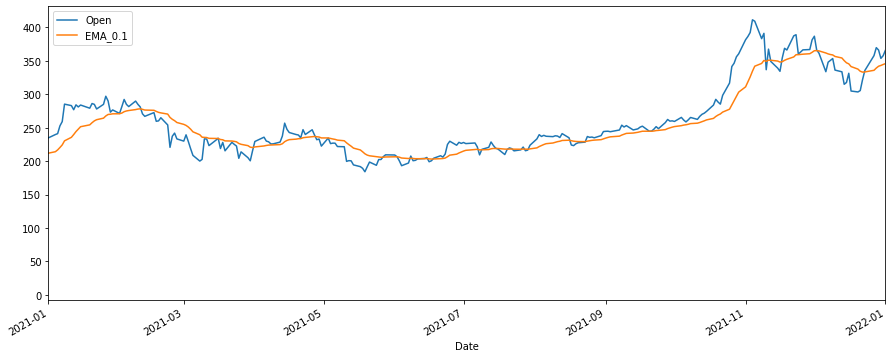

In [17]:
df_tesla[['Open' , 'EMA_0.1']].plot(xlim=['2021-01-01', '2022-01-01'], figsize=(15, 6))

### EWM for Open alpha 0.3

In [18]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

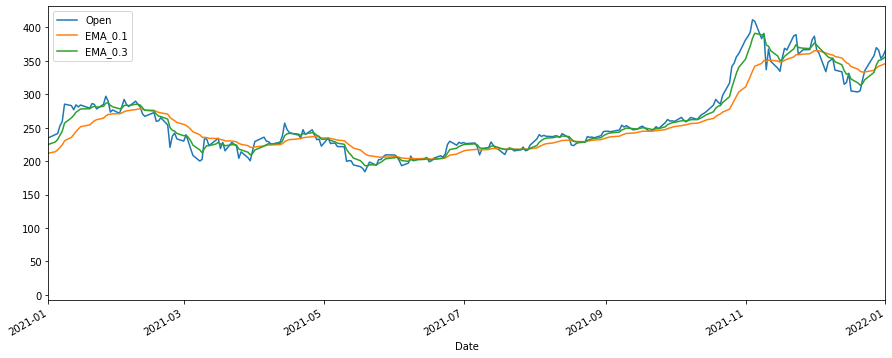

In [19]:
df_tesla[['Open' ,'EMA_0.1' , 'EMA_0.3']].plot(xlim=['2021-01-01', '2022-01-01'], figsize=(15, 6))

### EWM parameter Span

In [20]:
# df_tesla['EMA_5 days'] = df_tesla['Open'].ewm(span =5, alpha=0.3, adjust=False).mean()

In [21]:
df_tesla['EMA_5 days'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

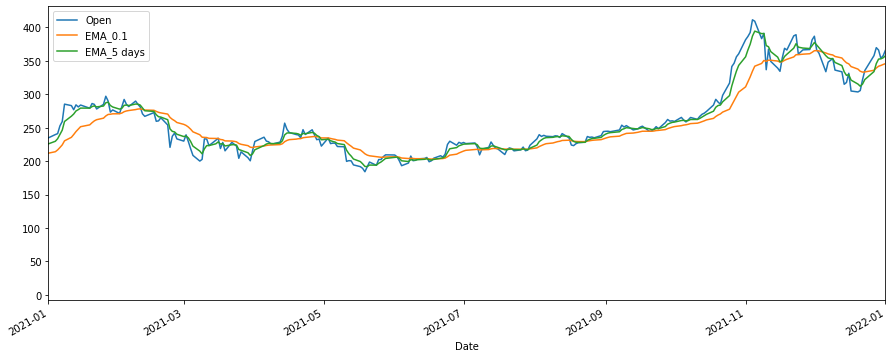

In [22]:
df_tesla[['Open' ,'EMA_0.1' , 'EMA_5 days']].plot(xlim=['2021-01-01', '2022-01-01'], figsize=(15, 6))

## ARIMA

##### Interview Questions on Time Series

## Moving Average Models